# Myntra 

## Exploratory data analysis (EDA)-

##### By - Chitransh karade 

- Introduction-
Myntra is a popular name among fashion enthusiasts, by fashion enthusiasts we mean quite everyone. Everyone wants to make a style statement and everyone wants to stand out. In this sort of environment, Myntra is a perfect destination for these people. It is a place that caters to a lot of demands in a single and simple setting. A single stop for all things fashion.

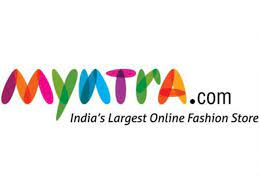

### Importing Libraries- 

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("Myntra Fasion Clothing.csv")

### Observing the dataset-

In [213]:
data.head()

,Product_id,Category,category_by_Gender,OriginalPrice (in Rs),SizeOption,Ratings,Reviews,Brandsnew,INdi_category_New,Discounted_price,Discountpercent,Total_discount
0,2296012,Bottom Wear,Men,1499.0,"28, 30, 32, 34, 36",3.9,999.0,Roadster,jeans,824.0,45.030020,675.0
1,13780156,Bottom Wear,Men,1149.0,"S, M, L, XL",4.0,999.0,Others,track-pants,517.0,55.004352,632.0
2,11895958,Topwear,Men,1399.0,"38, 40, 42, 44, 46, 48",4.3,999.0,Roadster,shirts,629.0,55.039314,770.0
3,4335679,Lingerie & Sleep Wear,Women,1295.0,"S, M, L, XL, XXL",4.2,999.0,Zivame,Others,893.0,31.042471,402.0
4,11690882,Western,Women,599.0,"XS, S, M, L, XL",4.2,999.0,Roadster,tshirts,599.0,0.000000,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   URL                    526564 non-null  object 
 1   Product_id             526564 non-null  int64  
 2   BrandName              526564 non-null  object 
 3   Category               526564 non-null  object 
 4   Individual_category    526564 non-null  object 
 5   category_by_Gender     526564 non-null  object 
 6   Description            526564 non-null  object 
 7   DiscountPrice (in Rs)  333406 non-null  float64
 8   OriginalPrice (in Rs)  526564 non-null  float64
 9   DiscountOffer          452258 non-null  object 
 10  SizeOption             526564 non-null  object 
 11  Ratings                190412 non-null  float64
 12  Reviews                190412 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ MB


In [15]:
data.shape # rows 526564 - columns - 13

(526564, 13)

In [16]:
data.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews'],
      dtype='object')

In [17]:
data.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
dtype: int64

# Handling Columns-

### Column - "Product_id"

In [153]:
df = data

In [19]:
df["Product_id"].unique()

array([ 2296012, 13780156, 11895958, ..., 17654114, 12508700, 17856544],
      dtype=int64)

In [20]:
df["Product_id"].value_counts()

2296012     1
17821316    1
17434400    1
10552660    1
10552704    1
           ..
14444934    1
10906224    1
14367046    1
11997768    1
17856544    1
Name: Product_id, Length: 526564, dtype: int64

#### - Everything looks ok.

### Column - "BrandName"

In [154]:
df["BrandName"].unique()

array(['Roadster', 'LOCOMOTIVE', 'Zivame', ..., 'Doodlage', 'CHOZI',
       'STATUS MANTRA'], dtype=object)

In [22]:
df["BrandName"].value_counts()

Pothys                   16005
Roadster                 10935
KALINI                    9589
HERE&NOW                  6515
HRX by Hrithik Roshan     5297
                         ...  
PIVOTO                       1
PEONY SMART WORLD            1
OFFIRA TEX WORLD             1
Sztori Garfield              1
Geonaute By Decathlon        1
Name: BrandName, Length: 2088, dtype: int64

#### - We would be needing brands we more than 1000 products by categories. Therefore creating new column with follow Info.

In [155]:
Brands = df["BrandName"].value_counts(ascending= False)
brandslessthan1000 = Brands[Brands<1000]

In [156]:
def handlingBrandName(value):
    if value in brandslessthan1000:
        return "Others"
    else :
        return value
df["Brandsnew"] = df["BrandName"].apply(handlingBrandName)
df["Brandsnew"].value_counts()

Others       257766
Pothys        16005
Roadster      10935
KALINI         9589
HERE&NOW       6515
              ...  
MIMOSA         1029
Harpa          1028
VASTRAMAY      1026
FREESOUL       1018
Okane          1012
Name: Brandsnew, Length: 119, dtype: int64

In [157]:
df["Brandsnew"].unique()

array(['Roadster', 'Others', 'Zivame', 'Mast & Harbour', 'HIGHLANDER',
       'HERE&NOW', 'HRX by Hrithik Roshan', 'Vishudh', 'Sangria',
       'Tokyo Talkies', 'DressBerry', 'Anouk', 'Enamor', 'all about you',
       'KASSUALLY', 'WROGN', 'SASSAFRAS', 'Moda Rapido', 'Harpa', 'plusS',
       'Varanga', 'STREET 9', 'Levis', 'Belle Fille', 'ether', 'Jockey',
       'Campus Sutra', 'Peter England', 'H&M', 'Clora Creation',
       'Saree mall', 'JAINISH', 'ETC', 'Clovia', 'Chkokko', 'Floret',
       'U.S. Polo Assn.', 'KALINI', 'Harvard', 'Hangup', 'XYXX',
       'Indo Era', 'TAG 7', 'Mitera', 'Chemistry', 'DEYANN',
       'Louis Philippe Sport', 'Florence', 'Kanvin', 'Jack & Jones',
       'Jompers', 'SOJANYA', 'Van Heusen', 'The Indian Garage Co',
       'Pepe Jeans', 'W', 'Friskers', 'Huetrap', 'Puma', 'VASTRANAND',
       'Sztori', 'Kryptic', 'max', 'Flying Machine', 'MANGO', 'Vero Moda',
       'KISAH', 'Biba', 'Allen Solly', 'ONLY',
       'United Colors of Benetton', 'GRACIT', 'Loui

In [158]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'Brandsnew'],
      dtype='object')

### Column - "Category"

In [159]:
df["Category"].unique()

array(['Bottom Wear', 'Topwear', 'Lingerie & Sleep Wear', 'Western',
       'Sports Wear', 'Indian Wear', 'Plus Size',
       'Inner Wear &  Sleep Wear'], dtype=object)

In [160]:
df["Category"].value_counts()

Indian Wear                 145845
Western                     140992
Topwear                      74537
Bottom Wear                  55439
Lingerie & Sleep Wear        55258
Sports Wear                  20627
Inner Wear &  Sleep Wear     20370
Plus Size                    13496
Name: Category, dtype: int64

In [39]:
#Seems Good .

### Column - 'Individual_category'

In [161]:
df['Individual_category'].unique()

array(['jeans', 'track-pants', 'shirts', 'shapewear', 'tshirts', 'tops',
       'trousers', 'tights', 'kurta-sets', 'jumpsuit', 'kurtas', 'bra',
       'shorts', 'dresses', 'bath-robe', 'jackets', 'socks', 'briefs',
       'sweatshirts', 'sarees', 'trunk', 'kurtis', 'skirts',
       'night-suits', 'lounge-pants', 'palazzos', 'stockings', 'jeggings',
       'leggings', 'shrug', 'boxers', 'dupatta', 'tunics',
       'innerwear-vests', 'sweaters', 'lounge-shorts', 'thermal-tops',
       'capris', 'nightdress', 'pyjamas', 'sports-sandals', 'dungarees',
       'tracksuits', 'camisoles', 'nehru-jackets', 'blazers',
       'thermal-bottoms', 'lounge-tshirts', 'lehenga-choli', 'baby-dolls',
       'coats', 'thermal-set', 'saree-blouse', 'churidar',
       'dress-material', 'boots', 'lingerie-set', 'sherwani', 'co-ords',
       'flats', 'swimwear', 'rain-jacket', 'patiala', 'salwar',
       'harem-pants', 'patiala-and-dupatta', 'lingerie-accessories',
       'saree-accessories', 'suits', 'dhoti

In [162]:
df['Individual_category'].value_counts()

tshirts           61198
sarees            57915
tops              39126
kurtas            38984
dresses           35590
                  ...  
jewellery-set         2
hair-accessory        1
lungi                 1
bracelet              1
flip-flops            1
Name: Individual_category, Length: 92, dtype: int64

In [163]:
categories = df['Individual_category'].value_counts(ascending= False)
categorieslessthan800 = categories[categories<800]

In [164]:
def handling_Individual_category(value):
    if value in categorieslessthan800:
        return "Others"
    else:
        return value
df['INdi_category_New'] = df['Individual_category'].apply(handling_Individual_category)
df['INdi_category_New'].unique()


array(['jeans', 'track-pants', 'shirts', 'Others', 'tshirts', 'tops',
       'trousers', 'tights', 'kurta-sets', 'jumpsuit', 'kurtas', 'bra',
       'shorts', 'dresses', 'jackets', 'socks', 'briefs', 'sweatshirts',
       'sarees', 'trunk', 'kurtis', 'skirts', 'night-suits',
       'lounge-pants', 'palazzos', 'jeggings', 'leggings', 'shrug',
       'boxers', 'dupatta', 'innerwear-vests', 'sweaters',
       'lounge-shorts', 'capris', 'nightdress', 'tracksuits', 'camisoles',
       'nehru-jackets', 'blazers', 'lehenga-choli', 'baby-dolls',
       'saree-blouse', 'dress-material', 'lingerie-set', 'sherwani',
       'swimwear', 'dhotis'], dtype=object)

In [165]:
df['INdi_category_New'].value_counts()

tshirts            61198
sarees             57915
tops               39126
kurtas             38984
dresses            35590
shirts             32692
kurta-sets         26592
jeans              25206
trousers           24706
bra                18097
track-pants        16407
shorts             13580
sweatshirts        13124
night-suits        11527
jackets            10625
briefs              9234
lounge-pants        8056
Others              6998
sweaters            6732
nightdress          6465
leggings            6005
skirts              4622
palazzos            3805
tights              3800
socks               3705
dupatta             3536
trunk               3081
jumpsuit            3039
boxers              3036
lehenga-choli       3012
nehru-jackets       2916
lounge-shorts       2634
innerwear-vests     1885
dress-material      1864
camisoles           1703
blazers             1675
capris              1666
saree-blouse        1615
shrug               1503
lingerie-set        1467


In [166]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'Brandsnew', 'INdi_category_New'],
      dtype='object')

### Columns - 'category_by_Gender'

In [167]:
df['category_by_Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [168]:
df['category_by_Gender'].value_counts()

Women    339185
Men      187379
Name: category_by_Gender, dtype: int64

#### -We have simple observation here about male and female But we will visualise it later .

### Column - "Description"

In [169]:
df['Description'].value_counts()

kanvin women pack of 2 printed pure cotton lounge pants                546
gracit women pack of 3 solid ankle length leggings                     255
clovia pack of 2 bra                                                   196
ethnic basket women multicoloured ethnic motifs printed crepe kurta    182
friskers men pack of 2 printed pure cotton t shirts                    171
                                                                      ... 
allen solly woman black wrap top                                         1
athena women lavender solid a line dress                                 1
all about you maroon ethnic motifs dress                                 1
wishful by w women green regular fit solid parallel trousers             1
jockey women blue extended sleeves t shirt                               1
Name: Description, Length: 429766, dtype: int64

### Columns - 'DiscountPrice (in Rs)'

In [170]:
df['DiscountPrice (in Rs)'].isnull().sum()

193158

-There are many null values in the 'DiscountPrice (in Rs)' column so we have to see fill those value with original price.
As we could not fill it will "0" or mean,median,mode it will directly affect the discount given.
first of all we will check weather original price has any null values.
then we will proceed further.

In [171]:
df['OriginalPrice (in Rs)'].isnull().sum() # there are no null values .

0

#### - We will create a new column , and put original price in place or null value. 

In [172]:
df["Discounted_price"] = df['DiscountPrice (in Rs)'].fillna(df['OriginalPrice (in Rs)'])

In [173]:
df["Discounted_price"].isnull().sum()

0

### Column - "DiscountOffer"

In [174]:
df["DiscountOffer"].unique()

array(['45% OFF', '55% OFF', '31% OFF', ..., 'Rs. 334 OFF', 'Rs. 375 OFF',
       'Rs. 283 OFF'], dtype=object)

In [175]:
df["DiscountOffer"].value_counts()

50% OFF         52737
60% OFF         38285
40% OFF         27348
20% OFF         25561
55% OFF         25154
                ...  
Rs. 809 OFF         1
Rs. 1676 OFF        1
Rs. 1663 OFF        1
Rs. 1885 OFF        1
Rs. 283 OFF         1
Name: DiscountOffer, Length: 1418, dtype: int64

 - Creating new column  - Discountpercent and Total_discount

In [176]:
df['Discountpercent'] = ((df['OriginalPrice (in Rs)'] - df['Discounted_price'])*100)/df['OriginalPrice (in Rs)']

In [177]:
df["Discountpercent"].unique()

array([45.03002001, 55.00435161, 55.0393138 , ..., 25.00247549,
       54.05940594, 45.02463054])

In [178]:
df["Total_discount"] = df['OriginalPrice (in Rs)'] - df['Discounted_price']

In [179]:
df["Total_discount"].value_counts()

0.0        193158
900.0        4588
600.0        4121
1200.0       4028
700.0        3715
            ...  
15120.0         1
7762.0          1
3065.0          1
20303.0         1
5048.0          1
Name: Total_discount, Length: 5416, dtype: int64

### Columns - "Ratings"

In [180]:
df["Ratings"].isnull().sum()

336152

- We have a huge number null values in ratings columns which is difficult to solve. There 3 ways to handle them 
1. Droping the column
2. Creating a sub-dataset removing all the null value it our approach is based on rating of that product .
3. Using machine learning-based methods, can be considered. These methods aim to predict and fill missing values based on the relationships between other variables in the dataset. Implementing these techniques typically requires more advanced knowledge and tools beyond basic pandas operations.
- Conclusion = In the end part of the EDA we will drop the null values to create a visulization based on Rating for now we will keep it as it is.

### Column -  "Reviews"  

In [181]:
df['Reviews'].value_counts()

5.0      12173
6.0       9876
7.0       8326
8.0       7346
9.0       6372
         ...  
960.0        1
992.0        1
994.0        1
821.0        1
997.0        1
Name: Reviews, Length: 1000, dtype: int64

In [182]:
df['Reviews'].isnull().sum()

336152

In [183]:
#handling reviews 
df['Reviews'].fillna(0,inplace = True)

In [184]:
df['Reviews'].isnull().sum()

0

In [185]:
df.columns

Index(['URL', 'Product_id', 'BrandName', 'Category', 'Individual_category',
       'category_by_Gender', 'Description', 'DiscountPrice (in Rs)',
       'OriginalPrice (in Rs)', 'DiscountOffer', 'SizeOption', 'Ratings',
       'Reviews', 'Brandsnew', 'INdi_category_New', 'Discounted_price',
       'Discountpercent', 'Total_discount'],
      dtype='object')

## Droping Columns - 

In [186]:
df1 = df

In [187]:
df1.drop(["URL","BrandName","Individual_category","Description","DiscountPrice (in Rs)","DiscountOffer"],axis =1 ,inplace = True )

In [188]:
df1.head()

,Product_id,Category,category_by_Gender,OriginalPrice (in Rs),SizeOption,Ratings,Reviews,Brandsnew,INdi_category_New,Discounted_price,Discountpercent,Total_discount
0,2296012,Bottom Wear,Men,1499.0,"28, 30, 32, 34, 36",3.9,999.0,Roadster,jeans,824.0,45.030020,675.0
1,13780156,Bottom Wear,Men,1149.0,"S, M, L, XL",4.0,999.0,Others,track-pants,517.0,55.004352,632.0
2,11895958,Topwear,Men,1399.0,"38, 40, 42, 44, 46, 48",4.3,999.0,Roadster,shirts,629.0,55.039314,770.0
3,4335679,Lingerie & Sleep Wear,Women,1295.0,"S, M, L, XL, XXL",4.2,999.0,Zivame,Others,893.0,31.042471,402.0
4,11690882,Western,Women,599.0,"XS, S, M, L, XL",4.2,999.0,Roadster,tshirts,599.0,0.000000,0.0


### Rearranging Columns - 

In [189]:
new_order = ['Product_id', 'Brandsnew','Category','INdi_category_New', 'category_by_Gender',
             'SizeOption', 'OriginalPrice (in Rs)',
             'Discounted_price', 'Discountpercent', 'Total_discount','Ratings', 'Reviews']
df1 = df1[new_order]
             
       

In [190]:
df1.columns

Index(['Product_id', 'Brandsnew', 'Category', 'INdi_category_New',
       'category_by_Gender', 'SizeOption', 'OriginalPrice (in Rs)',
       'Discounted_price', 'Discountpercent', 'Total_discount', 'Ratings',
       'Reviews'],
      dtype='object')

In [191]:
df1.head()

,Product_id,Brandsnew,Category,INdi_category_New,category_by_Gender,SizeOption,OriginalPrice (in Rs),Discounted_price,Discountpercent,Total_discount,Ratings,Reviews
0,2296012,Roadster,Bottom Wear,jeans,Men,"28, 30, 32, 34, 36",1499.0,824.0,45.030020,675.0,3.9,999.0
1,13780156,Others,Bottom Wear,track-pants,Men,"S, M, L, XL",1149.0,517.0,55.004352,632.0,4.0,999.0
2,11895958,Roadster,Topwear,shirts,Men,"38, 40, 42, 44, 46, 48",1399.0,629.0,55.039314,770.0,4.3,999.0
3,4335679,Zivame,Lingerie & Sleep Wear,Others,Women,"S, M, L, XL, XXL",1295.0,893.0,31.042471,402.0,4.2,999.0
4,11690882,Roadster,Western,tshirts,Women,"XS, S, M, L, XL",599.0,599.0,0.000000,0.0,4.2,999.0


## Visualisation - 

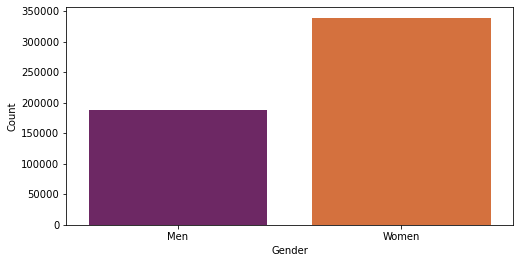

In [192]:
plt.figure(figsize=(8,4))
sns.countplot( x = "category_by_Gender", data = df1 , palette= "inferno")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

- Women has category advantage over men .
- Below we can analyse their categorical selection of the clothes 

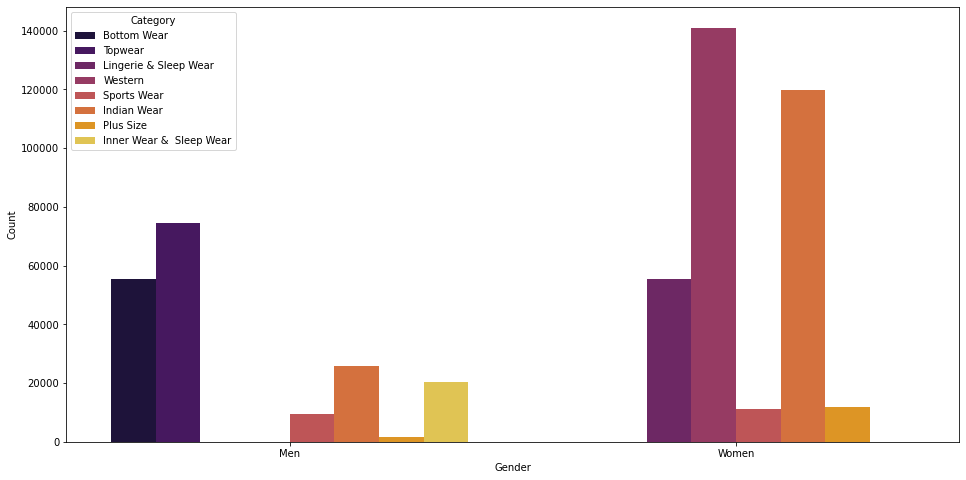

In [131]:
plt.figure(figsize=(16,8))
sns.countplot( x = "category_by_Gender",hue="Category" , data = df1 , palette= "inferno")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

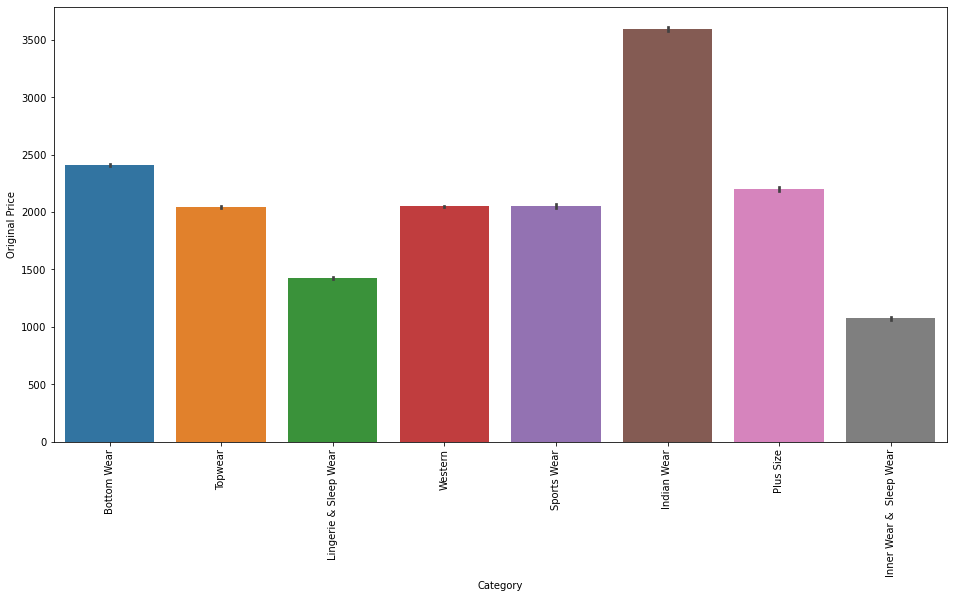

In [136]:
plt.figure(figsize = (16,8))
sns.barplot(x = "Category" , y = "OriginalPrice (in Rs)" , data = df1)
plt.xticks(rotation = 90)
plt.xlabel("Category")
plt.ylabel("Original Price")
plt.show()

- The least to most expensive categories can be observed .
  ie. Indian Wear To Inner wear

In [137]:
df1.columns

Index(['Product_id', 'Brandsnew', 'Category', 'INdi_category_New',
       'category_by_Gender', 'SizeOption', 'OriginalPrice (in Rs)',
       'Discounted_price', 'Discountpercent', 'Total_discount', 'Ratings',
       'Reviews'],
      dtype='object')

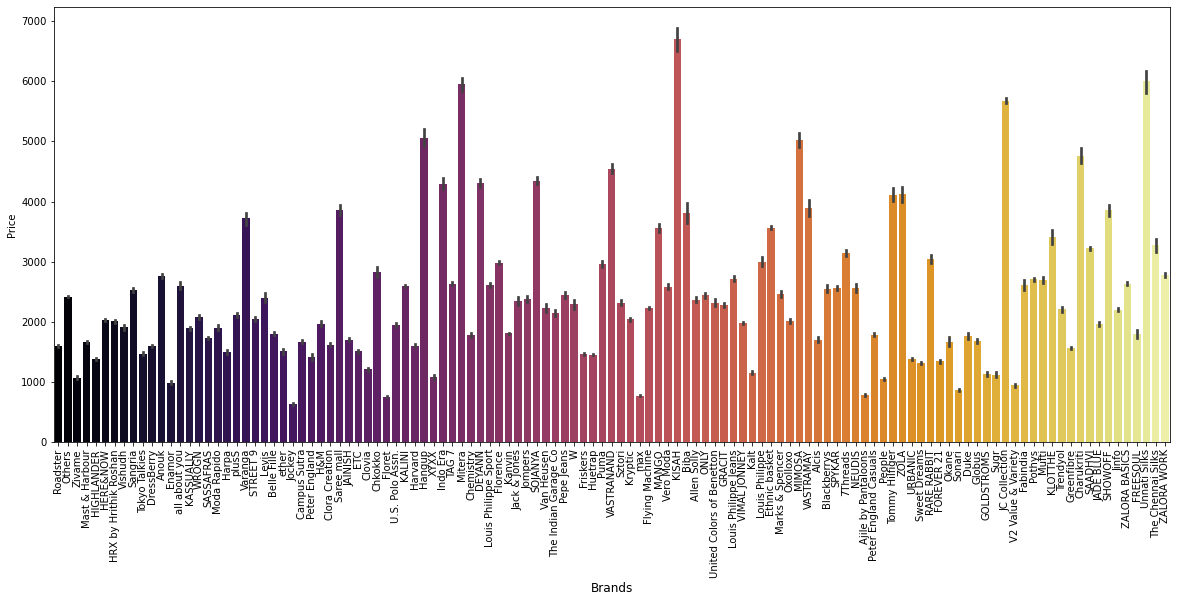

In [202]:
plt.figure(figsize = (20,8))
sns.barplot(x = "Brandsnew" , y = "OriginalPrice (in Rs)", data = df1 , palette= "inferno")
plt.xticks(rotation = 90)
plt.xlabel("Brands" , fontsize = 12)
plt.ylabel("Price")
plt.show()

- Most expensive Brand is -Kisah
- Least expensive is - Jockey

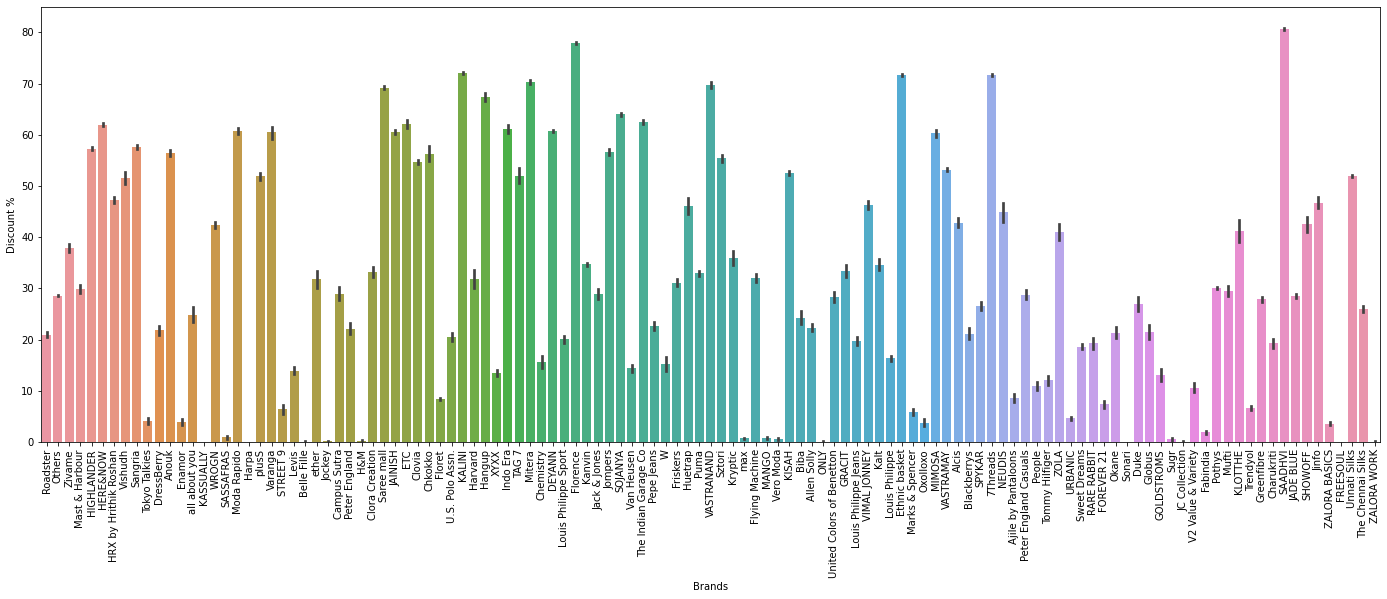

In [198]:
plt.figure(figsize = (24,8))
sns.barplot(x = "Brandsnew" , y = "Discountpercent", data = df1)
plt.xticks(rotation = 90)
plt.xlabel("Brands")
plt.ylabel("Discount %")
plt.show()

- Maximum discount is offered by - Saadhvi
- Minimum discount is offered by only , H&M , and many more.

In [200]:
df1.columns

Index(['Product_id', 'Brandsnew', 'Category', 'INdi_category_New',
       'category_by_Gender', 'SizeOption', 'OriginalPrice (in Rs)',
       'Discounted_price', 'Discountpercent', 'Total_discount', 'Ratings',
       'Reviews'],
      dtype='object')

#### Category Wise discount-

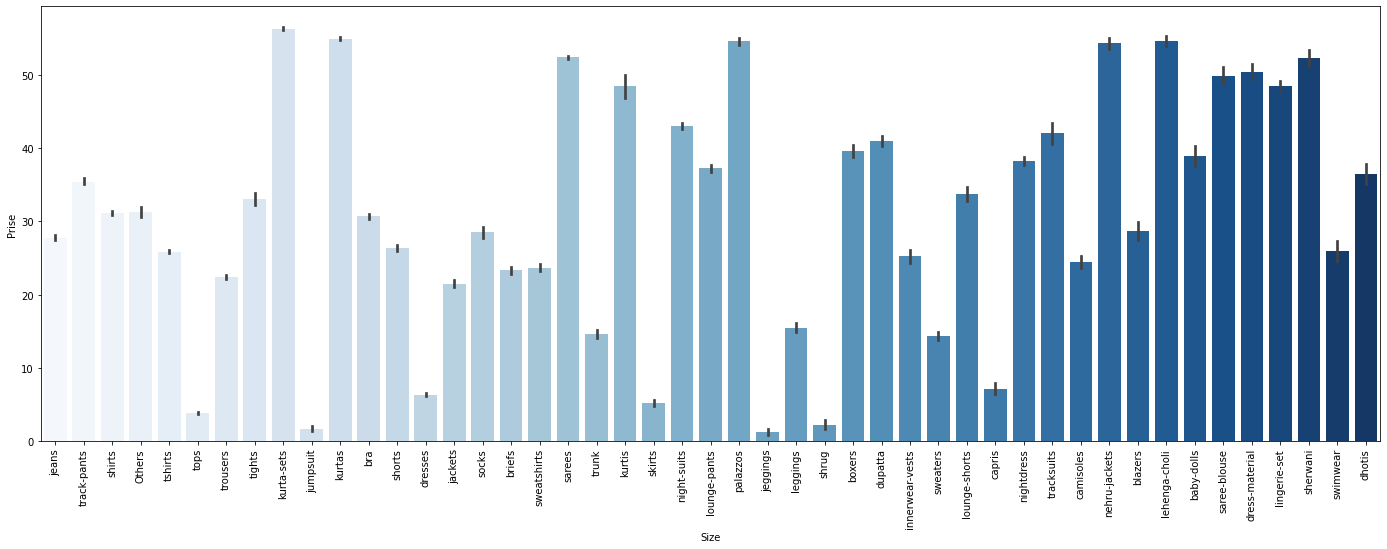

In [207]:
plt.figure(figsize = (24,8))
sns.barplot(x = "INdi_category_New" , y = "Discountpercent", data = df1 , palette= "Blues")
plt.xticks(rotation = 90)
plt.xlabel("Size")
plt.ylabel("Prise")
plt.show()

In [ ]:
- 

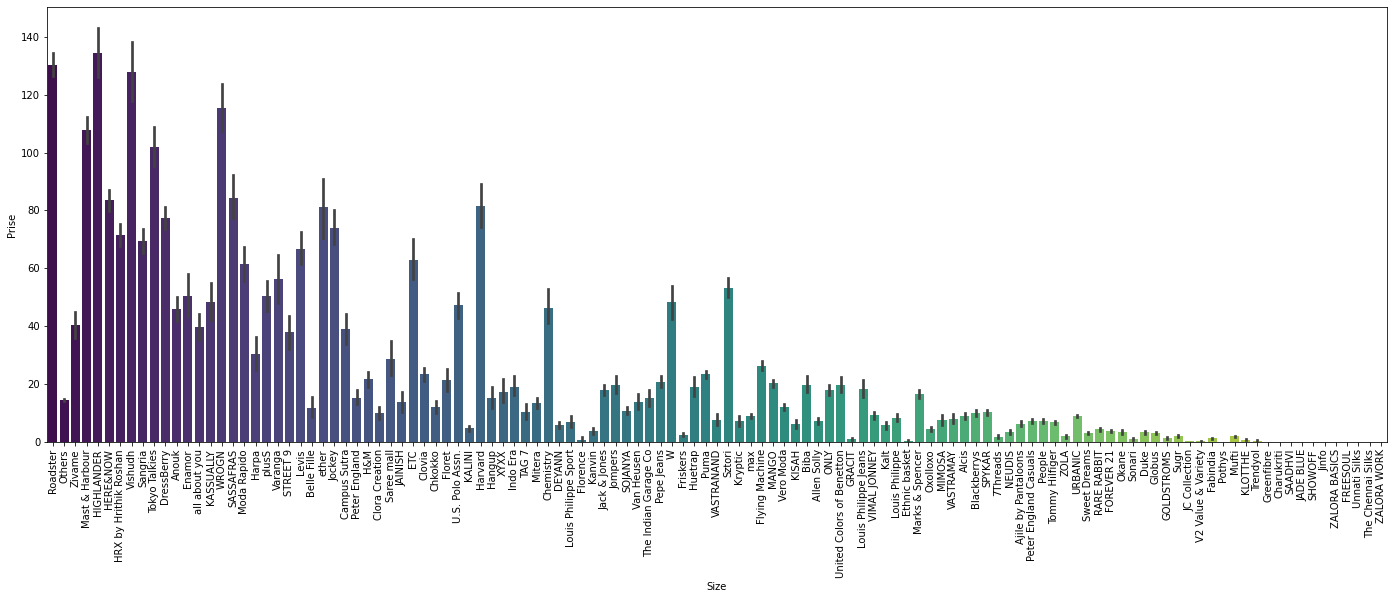

In [206]:
plt.figure(figsize = (24,8))
sns.barplot(x = "Brandsnew" , y = "Reviews", data = df1 , palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel("Size")
plt.ylabel("Prise")
plt.show()

- Highlander and Roadster are the most reviewed brand.

- Summary of Myntra Sale Dataset:

The Myntra Sale dataset consists of various columns that provide information about the products on sale. Here's a summary of each column:

1. **Product_id**: A unique identifier for each product in the dataset.

2. **Brandsnew**: Represents the brand name associated with the product.

3. **Category**: Indicates the general category or type of the product.

4. **INdi_category_New**: Represents a more specific category or sub-category of the product.

5. **category_by_Gender**: Indicates the category of the product based on the target gender (e.g., men, women, unisex).

6. **SizeOption**: Provides information about the available size options for the product.

7. **OriginalPrice (in Rs)**: Represents the original price of the product before any discount is applied, in Indian Rupees.

8. **Discounted_price**: Indicates the sale price of the product after the discount has been applied.

9. **Discountpercent**: Represents the percentage of discount applied to the original price.

10. **Total_discount**: Provides the total amount saved on the product, calculated as the difference between the original price and the discounted price.

11. **Ratings**: Represents the rating assigned to the product by customers. It indicates the overall satisfaction or quality of the product, typically on a numerical scale.

12. **Reviews**: Provides textual reviews or feedback given by customers for the product.

The Myntra Sale dataset allows for analyzing various aspects of the products available for sale, such as brand, category, price, discounts, ratings, and customer reviews. Through exploratory data analysis and statistical techniques, you can gain insights into customer preferences, product performance, pricing strategies, and more.